<a href="https://colab.research.google.com/github/RalfHaller/Deep-Learning-Coursera/blob/master/pytorch_intro_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.86x - Introduction to ML Packages (Part 2)

This tutorial is designed to provide a short introduction to deep learning with PyTorch.

You can start studying this tutorial as you work through unit 3 of the course.
For more resources, check out [the PyTorch tutorials](https://pytorch.org/tutorials/)! There are many more in-depth examples available there.


Source code for this notebook hosted at: https://github.com/varal7/ml-tutorial

## PyTorch

[PyTorch](https://pytorch.org) is a flexible scientific computing package targetted towards gradient-based deep learning. Its low-level API closely follows [NumPy](http://www.numpy.org/). However, there are a several key additions:

-  GPU support!
-  Automatic differentiation!
-  Deep learning modules!
-  Data loading!
-  And other generally useful goodies.

If you don't have GPU enabled hardward, don't worry. Like NumPy, PyTorch runs pre-compiled, highly efficient C code to handle all intensive backend functions.

Go to pytorch.org to download the correct package for your computing environment.

In [1]:
# Start by importing torch
import torch

### Tensors

Tensors are PyTorch's equivalent of NumPy ndarrays.

In [2]:
# Construct a bunch of ones
some_ones = torch.ones(2, 2)
print(some_ones)

# Construct a bunch of zeros
some_zeros = torch.zeros(2, 2)
print(some_zeros)

# Construct some normally distributed values
some_normals = torch.randn(2, 2)
print(some_normals)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[ 0.3582, -0.9940],
        [-0.9055,  1.6229]])


PyTorch tensors and NumPy ndarrays even share the same memory handles, so you can switch between the two types essentially for free:

In [3]:
torch_tensor = torch.randn(5, 5)
numpy_ndarray = torch_tensor.numpy()
back_to_torch = torch.from_numpy(numpy_ndarray)

Like NumPy, there are a zillion different operations you can do with tensors. Best thing to do is to go to https://pytorch.org/docs/stable/tensors.html if you know you want to do something to a tensor but don't know how!

We can cover a few major ones here:

In the Numpy tutorial, we have covered the basics of Numpy, numpy arrays, element-wise operations, matrices operations and generating random matrices.
In this section, we'll cover indexing, slicing and broadcasting, which are useful concepts that will be reused in `Pandas` and `PyTorch`.


In [4]:
# Create two tensors
a = torch.randn(5, 5)
b = torch.randn(5, 5)
print(a)
print(b)

tensor([[-1.8930, -0.3441,  1.4284,  0.3184, -0.9409],
        [ 0.4297, -0.9439,  0.0641, -0.8139,  0.2009],
        [ 1.1114, -1.4222, -0.9396,  1.2104, -2.1731],
        [ 0.2741, -0.2245,  1.1212, -1.0734, -0.8905],
        [ 1.9947,  0.7139, -0.4846,  1.8461, -2.4963]])
tensor([[-0.1588,  1.3765,  0.7060, -0.5220, -0.0715],
        [ 0.4131,  0.2312,  0.8804,  0.1105,  0.5809],
        [-0.7704, -0.0875,  0.0524,  0.6412,  0.4545],
        [ 0.5911,  0.3765, -0.0109,  1.2017, -0.1857],
        [-0.8741,  0.1627,  0.5480, -0.7681, -0.0340]])


In [5]:
# Indexing by i,j
another_tensor = a[2, 2]
print(a)
print(another_tensor)

# The above returns a tensor type! To get the python value:
python_value = a[2, 2].item()
print(python_value)

tensor([[-1.8930, -0.3441,  1.4284,  0.3184, -0.9409],
        [ 0.4297, -0.9439,  0.0641, -0.8139,  0.2009],
        [ 1.1114, -1.4222, -0.9396,  1.2104, -2.1731],
        [ 0.2741, -0.2245,  1.1212, -1.0734, -0.8905],
        [ 1.9947,  0.7139, -0.4846,  1.8461, -2.4963]])
tensor(-0.9396)
-0.9396000504493713


In [6]:
# Getting a whole row or column or range
first_row = a[0, :]
first_column = a[:, 0]
combo = a[2:4, 2:4]
print(combo)

tensor([[-0.9396,  1.2104],
        [ 1.1212, -1.0734]])


In [20]:
# Addition
c = a + b

# Elementwise multiplication: c_ij = a_ij * b_ij
c = a * b

# Matrix multiplication: c_ik = a_ij * b_jk
c = a.mm(b)

# Matrix vector multiplication
c = a.matmul(b[:, 0])
c = c.numpy()
print(c)
c= torch.from_numpy(c)
print(c)

[ 0.06870461 -1.164201    2.5746806  -0.8562423   3.6245227 ]
tensor([ 0.0687, -1.1642,  2.5747, -0.8562,  3.6245])


In [31]:
a = torch.randn(5, 5)
print(a)
print(a.size())

vec = a[:, 0]
print(vec)
print(vec.size())

# Matrix multiple 5x5 * 5x5 --> 5x5
aa = a.mm(a)
print(aa)
print(aa.size())

# matrix vector 5x5 * 5 --> 5
v1 = a.matmul(vec)
print(v1)
print(v1.size())


vec_as_matrix = vec.view(5, 1)
v2 = a.mm(vec_as_matrix)
print(v2)
print(v2.size())

tensor([[ 1.4284, -0.8039, -0.4892,  0.5051, -0.9069],
        [-0.2046,  0.4674,  1.7486, -1.2886,  1.1523],
        [ 0.3612,  1.4173, -1.5495, -0.8914,  0.0215],
        [ 0.4642, -0.9129, -0.1772, -0.0857,  0.2109],
        [ 0.1658,  1.4068, -0.8863,  0.6164, -0.0135]])
torch.Size([5, 5])
tensor([ 1.4284, -0.2046,  0.3612,  0.4642,  0.1658])
torch.Size([5])
tensor([[ 2.1121, -3.9544, -0.6321,  1.5912, -2.1136],
        [-0.1635,  5.6587, -2.5850, -1.4437,  0.4745],
        [-0.7440, -0.9800,  4.8414, -0.1731,  1.0840],
        [ 0.7810, -0.6761, -1.7205,  1.7062, -1.4977],
        [-0.0872, -1.3136,  3.6549, -1.0001,  1.5818]])
torch.Size([5, 5])
tensor([ 2.1121, -0.1635, -0.7440,  0.7810, -0.0872])
torch.Size([5])
tensor([[ 2.1121],
        [-0.1635],
        [-0.7440],
        [ 0.7810],
        [-0.0872]])
torch.Size([5, 1])


In-place operations exist to, generally denoted by a trailing '_' (e.g. my_tensor.my_inplace_function_).

In [ ]:
# Add one to all elements
a.add_(1)

# Divide all elements by 2
a.div_(2)

# Set all elements to 0
a.zero_()

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

Manipulate dimensions...

In [35]:
# Add a dummy dimension, e.g. (n, m) --> (n, m, 1)
a = torch.randn(10, 10)
print("dim(a)", a.size())

# At the end
print(a.unsqueeze(-1).size())

# At the beginning
print(a.unsqueeze(0).size())

# In the middle
print(a.unsqueeze(1).size())

# What you give you can take away
print(a.unsqueeze(0).squeeze(0).size())

# View things differently, i.e. flat
print(a.view(100, 1).size())

# Or not flat
print(a.view(50, 2).size())

# Copy data across a new dummy dimension!
a = torch.randn(2)
a = a.unsqueeze(-1)
print(a)
print(a.expand(2, 3))

dim(a) torch.Size([10, 10])
torch.Size([10, 10, 1])
torch.Size([1, 10, 10])
torch.Size([10, 1, 10])
torch.Size([10, 10])
torch.Size([100, 1])
torch.Size([50, 2])
tensor([[ 0.7190],
        [-1.5691]])
tensor([[ 0.7190,  0.7190,  0.7190],
        [-1.5691, -1.5691, -1.5691]])


If you have a GPU...

In [36]:
# Check if you have it
do_i_have_cuda = torch.cuda.is_available()

if do_i_have_cuda:
    print('Using fancy GPUs')
    # One way
    a = a.cuda()
    a = a.cpu()

    # Another way
    device = torch.device('cuda')
    a = a.to(device)

    device = torch.device('cpu')
    a = a.to(device)
else:
    print('CPU it is!')

CPU it is!


And many more!

## A Quick Note about Batching

In most ML applications we do mini-batch stochastic gradient descent instead of pure stochastic gradient descent.

Mini-batch SGD is a step between full gradient descent and stochastic gradient descent by computing the average gradient over a small number of examples.

In a nutshell, given `n` examples:
- **Full GD:** dL/dw = average over all `n` examples. One step per `n` examples.
- **SGD:** dL/dw = point estimate over a single example. `n` steps per `n` examples.
- **Mini-batch SGD:** dL/dw = average over `m << n` examples. `n / m` steps per `n` examples.

Advantages of mini-batch SGD include a more stable gradient estimate and computational efficiency on modern hardware (exploiting parallelism gives sub-linear to constant time complexity, especially on GPU).

In PyTorch, batched tensors are represented as just another dimension. Most of the deep learning modules assume batched tensors as input (even if the batch size is just 1).

In [41]:
# Batched matrix multiply
a = torch.randn(2, 2, 2)
b = torch.randn(2, 2, 2)
print(a)
print(b)

# The same as for i in 1 ... 10, c_i = a[i].mm(b[i])
c = a.bmm(b)
print(c)
print(c.size())

tensor([[[ 0.2741,  1.5613],
         [ 0.3099, -0.0329]],

        [[ 1.1051, -0.5294],
         [ 0.1456,  0.6184]]])
tensor([[[ 2.2839,  0.7201],
         [ 0.2191, -0.1988]],

        [[ 0.5085, -2.1324],
         [-0.4870, -0.5480]]])
tensor([[[ 0.9681, -0.1131],
         [ 0.7006,  0.2297]],

        [[ 0.8198, -2.0663],
         [-0.2271, -0.6495]]])
torch.Size([2, 2, 2])


## Autograd: Automatic Differentiation!

Along with the flexible deep learning modules (to follow) this is the best part of using a package PyTorch.

What is autograd? It *automatically* computes *gradients*. All those complicated functions you might be using for your model need gradients for back-propagation. Autograd does this auto-magically! (Sorry, you still need to do this by hand for homework 4.)

Let's warmup.

In [42]:
# A tensor that will remember gradients
x = torch.randn(1, requires_grad=True)
print(x)

tensor([-1.1178], requires_grad=True)


At first the 'grad' parameter is None:

In [43]:
print(x.grad)

None


Let's do an operation. Take y = e^x.

In [44]:
y = x.exp()

To run the gradient computing magic, call '.backward()' on a variable.

In [45]:
y.backward()

For all dependent variables {x_1, ..., x_n} that were used to compute y, dy/x_i is computed and stored in the x_i.grad field.

Here dy/dx = e^x = y. Let's see!

In [46]:
print(x.grad, y)

tensor([0.3270]) tensor([0.3270], grad_fn=<ExpBackward0>)


**Important!** Remember to zero gradients before subsequent calls to backwards.

In [52]:
# Compute another thingy with x.
z = x * 2
z.backward()

# Should be 2! But it will be 2 + e^x.
print(x.grad)

tensor([12.3270])


In [53]:
x_a = torch.randn(1, requires_grad=True)
x_b = torch.randn(1, requires_grad=True)
x = x_a * x_b
x1 = x ** 2
x2 = 1 / x1
x3 = x2.exp()
x4 = 1 + x3
x5 = x4.log()
x6 = x5 ** (1/3)
x6.backward()
print(x_a.grad)
print(x_b.grad)


x = torch.randn(1, requires_grad=True)
y = torch.tanh(x)
y.backward()
print(x.grad)

tensor([2.6546])
tensor([-12.3214])
tensor([0.5223])


**Also important!** Under the hood PyTorch stores all the stuff required to compute gradients (call stack, cached values, etc). If you want to save a variable just to keep it around (say for logging or plotting) remember to call `.item()` to get the python value and free the PyTorch machinery memory.

You can stop auto-grad from running in the background by using the `torch.no_grad()` context manager.

```python
with torch.no_grad():
    do_all_my_things()
```

## Manual Neural Net + Autograd SGD Example (read this while studying unit 3)

Before we move on to the full PyTorch wrapper library, let's do a simple NN SGD example by hand.

We'll train a one hidden layer feed forward NN on a toy dataset.

In [4]:
# Set our random seeds
import random
import numpy as np
# Start by importing torch
import torch
import matplotlib
import matplotlib.pyplot as plt

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

Number of examples: 100
Number of features: 2


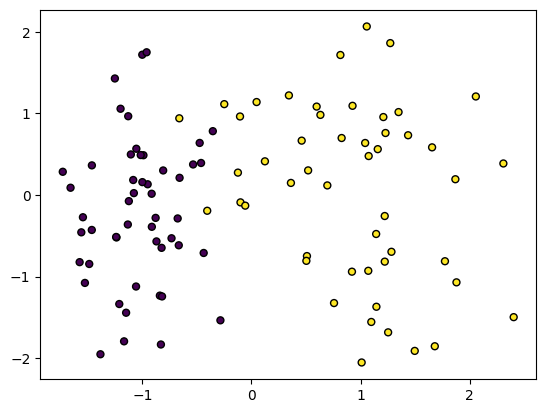

In [5]:
# Get ourselves a simple dataset
from sklearn.datasets import make_classification
set_seed(7)
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
print('Number of examples: %d' % X.shape[0])
print('Number of features: %d' % X.shape[1])

# Take a peak
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')
plt.show()

In [6]:
# Convert data to PyTorch
X, Y = torch.from_numpy(X), torch.from_numpy(Y)

# Gotcha: "Expected object of scalar type Float but got scalar type Double"
# If you see this it's because numpy defaults to Doubles whereas pytorch has floats.
X, Y = X.float(), Y.float()

We'll train a one layer neural net to classify this dataset. Let's define the parameter sizes:

In [7]:
# Define dimensions
num_feats = 2
hidden_size = 100
num_outputs = 1

# Learning rate
eta = 0.1
num_steps = 1000

And now run a few steps of SGD!

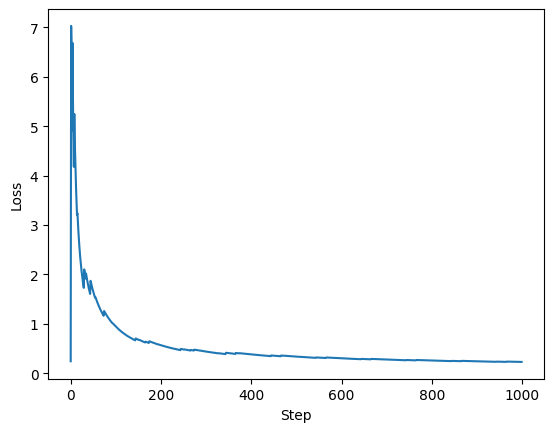

In [8]:
# Input to hidden weights
W1 = torch.randn(hidden_size, num_feats, requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)

# Hidden to output
W2 = torch.randn(num_outputs, hidden_size, requires_grad=True)
b2 = torch.zeros(num_outputs, requires_grad=True)

# Group parameters
parameters = [W1, b1, W2, b2]

# Get random order
indices = torch.randperm(X.size(0))

# Keep running average losses for a learning curve?
avg_loss = []

# Run!
for step in range(num_steps):
    # Get example
    i = indices[step % indices.size(0)]
    x_i, y_i = X[i], Y[i]

    # Run example
    hidden = torch.relu(W1.matmul(x_i) + b1)
    y_hat = torch.sigmoid(W2.matmul(hidden) + b2)

    # Compute loss binary cross entropy: -(y_i * log(y_hat) + (1 - y_i) * log(1 - y_hat))
    # Epsilon for numerical stability
    eps = 1e-6
    loss = -(y_i * (y_hat + eps).log() + (1 - y_i) * (1 - y_hat + eps).log())

    # Add to our running average learning curve. Don't forget .item()!
    if step == 0:
        avg_loss.append(loss.item())
    else:
        old_avg = avg_loss[-1]
        new_avg = (loss.item() + old_avg * len(avg_loss)) / (len(avg_loss) + 1)
        avg_loss.append(new_avg)

    # Zero out all previous gradients
    for param in parameters:
        # It might start out as None
        if param.grad is not None:
            # In place
            param.grad.zero_()

    # Backward pass
    loss.backward()

    # Update parameters
    for param in parameters:
        # In place!
        param.data = param.data - eta * param.grad


plt.plot(range(num_steps), avg_loss)
plt.ylabel('Loss')
plt.xlabel('Step')
plt.show()

## torch.nn

The `nn` package is where all of the cool neural network stuff is. Layers, loss functions, etc.

Let's dive in.

### Layers

Before we manually defined our linear layers. PyTorch has them for you as sub-classes of `nn.Module`.

In [9]:
import torch.nn as nn

# Linear layer: in_features, out_features
linear = nn.Linear(10, 10)
print(linear)

# Convolution layer: in_channels, out_channels, kernel_size, stride
conv = nn.Conv2d(1, 20, 5, 1)
print(conv)

# RNN: num_inputs, num_hidden, num_layers
rnn = nn.RNN(10, 10, 1)
print(rnn)

Linear(in_features=10, out_features=10, bias=True)
Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
RNN(10, 10)


In [10]:
print(linear.weight)
print([k for k,v in conv.named_parameters()])

Parameter containing:
tensor([[-0.2087,  0.0624,  0.0927,  0.2812,  0.0016,  0.2136, -0.1054, -0.2304,
         -0.0307,  0.1642],
        [-0.1235, -0.2677, -0.1926,  0.0560,  0.3015,  0.0175, -0.2549, -0.1416,
          0.1605, -0.0995],
        [-0.0427,  0.2353,  0.1162,  0.1936,  0.2839, -0.1041,  0.0458, -0.2373,
          0.3143, -0.2120],
        [ 0.3006,  0.2895,  0.0688, -0.2734, -0.0102, -0.1303,  0.0969,  0.1788,
          0.1761,  0.1016],
        [-0.2423, -0.2660,  0.0934, -0.0694,  0.1478,  0.3073,  0.0955, -0.1904,
         -0.0913,  0.1948],
        [ 0.0300,  0.2156, -0.3031, -0.0390, -0.1542,  0.2403,  0.1383, -0.0424,
         -0.2934, -0.0373],
        [ 0.2564, -0.0085, -0.0131, -0.2924,  0.2504,  0.2616, -0.2541, -0.2243,
          0.0153, -0.1809],
        [-0.2588,  0.0992, -0.0820,  0.1096,  0.1257,  0.2816,  0.1879, -0.2973,
         -0.2548,  0.2535],
        [-0.2687,  0.1933, -0.1927,  0.2537,  0.1788, -0.2183, -0.2614, -0.1386,
         -0.1446, -0.1795

In [12]:
# Make our own model!

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input channel to 20 feature maps of 5x5 kernel. Stride 1.
        self.conv1 = nn.Conv2d(1, 20, 5, 1)

        # 20 input channels to 50 feature maps of 5x5 kernel. Stride 1.
        self.conv2 = nn.Conv2d(20, 50, 5, 1)

        # Full connected of final 4x4 image to 500 features
        self.fc1 = nn.Linear(4*4*50, 500)

        # From 500 to 10 classes
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Initialize it
model = Net()

A note on convolution sizes:

Running a kernel over the image reduces the image height/length by kernel_size - 1.

Running a max pooling over the image reduces the image heigh/length by a factor of the kernel size.

So starting from a 28 x 28 image:

-  Run 5x5 conv --> 24 x 24
-  Apply 2x2 max pool --> 12 x 12
-  Run 5x5 conv --> 8 x 8
-  Apply 2x2 max pool --> 4 x 4

### Optimizers

PyTorch handles all the optimizing too. There are several algorithms you can learn about later. Here's SGD:


In [13]:
import torch.optim as optim

# Initialize with model parameters
optimizer = optim.SGD(model.parameters(), lr=0.01)

Updating is now as easy as:

```python
loss = loss_fn()
optimizer.zero_grad()
loss.backward()
optimizer.step()
```

### Full train and test loops
Let's look at a full train loop now.

In [14]:
import tqdm
import torch.nn.functional as F

def train(model, train_loader, optimizer, epoch):
    # For things like dropout
    model.train()

    # Avg loss
    total_loss = 0

    # Iterate through dataset
    for data, target in tqdm.tqdm(train_loader):
        # Zero grad
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Negative log likelihood loss function
        loss = F.nll_loss(output, target)

        # Backward pass
        loss.backward()
        total_loss += loss.item()

        # Update
        optimizer.step()

    # Print average loss
    print("Train Epoch: {}\t Loss: {:.6f}".format(epoch, total_loss / len(train_loader)))

Testing loops are similar.

In [15]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

## MNIST

Just going to run mnist!

In [16]:
from torchvision import datasets, transforms

# See the torch DataLoader for more details.
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=32, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=32, shuffle=True)


for epoch in range(1, 10 + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

100%|██████████| 9912422/9912422 [00:00<00:00, 108486206.23it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 37422210.02it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24320644.38it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4011482.16it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1875/1875 [01:18<00:00, 23.96it/s]


Train Epoch: 1	 Loss: 0.330469

Test set: Average loss: 0.0879, Accuracy: 9743/10000 (97%)



100%|██████████| 1875/1875 [01:11<00:00, 26.27it/s]


Train Epoch: 2	 Loss: 0.084864

Test set: Average loss: 0.0632, Accuracy: 9806/10000 (98%)



100%|██████████| 1875/1875 [01:09<00:00, 26.79it/s]


Train Epoch: 3	 Loss: 0.060137

Test set: Average loss: 0.0457, Accuracy: 9852/10000 (99%)



100%|██████████| 1875/1875 [01:08<00:00, 27.30it/s]


Train Epoch: 4	 Loss: 0.047299

Test set: Average loss: 0.0398, Accuracy: 9860/10000 (99%)



100%|██████████| 1875/1875 [01:09<00:00, 27.16it/s]


Train Epoch: 5	 Loss: 0.038761

Test set: Average loss: 0.0347, Accuracy: 9892/10000 (99%)



100%|██████████| 1875/1875 [01:11<00:00, 26.05it/s]


Train Epoch: 6	 Loss: 0.033457

Test set: Average loss: 0.0325, Accuracy: 9892/10000 (99%)



100%|██████████| 1875/1875 [01:08<00:00, 27.27it/s]


Train Epoch: 7	 Loss: 0.029002

Test set: Average loss: 0.0305, Accuracy: 9897/10000 (99%)



100%|██████████| 1875/1875 [01:09<00:00, 26.94it/s]


Train Epoch: 8	 Loss: 0.025455

Test set: Average loss: 0.0326, Accuracy: 9893/10000 (99%)



100%|██████████| 1875/1875 [01:08<00:00, 27.37it/s]


Train Epoch: 9	 Loss: 0.022329

Test set: Average loss: 0.0321, Accuracy: 9896/10000 (99%)



100%|██████████| 1875/1875 [01:08<00:00, 27.45it/s]


Train Epoch: 10	 Loss: 0.019973

Test set: Average loss: 0.0290, Accuracy: 9901/10000 (99%)

